In [195]:
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [197]:
train_dataset_file_path = "/content/drive/MyDrive/python_data_analysis/data/titanic_train.csv"
test_dataset_file_path = "/content/drive/MyDrive/python_data_analysis/data/titanic_test.csv"

train_df = pd.read_csv(train_dataset_file_path)
test_df = pd.read_csv(test_dataset_file_path)

# [1] 데이터 확인하기 

In [198]:
print(train_df.shape, test_df.shape)
print(train_df.info(), test_df.info())

(916, 13) (393, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-nul

In [199]:
display(train_df.head(10))
display(test_df.head(10))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
5,3,0,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q,NaN,NaN
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,NaN,NaN
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,NaN,"Plymouth, Devon / Detroit, MI"
8,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,"Haverford, PA"
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,NaN,"St Louis, MO"


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"
5,3,1,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,NaN,NaN
6,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,NaN,"New York, NY"
7,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,NaN,"Toronto, ON"
8,2,0,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S,NaN,"West Hoboken, NJ"
9,3,1,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S,NaN,NaN


1. 티켓번호인데 dtype이 object? 
2. null 값이 있는 feature: age, cabin, body, home.dest

In [200]:
# 불필요한 feature 제거하기: null 값 처리는 age에 대해서만 하면 됨! 
train_df = train_df.drop(['name', 'ticket', 'cabin', 'body', 'home.dest'], axis=1)
test_df = test_df.drop(['name', 'ticket', 'cabin', 'body', 'home.dest'], axis=1)

## 남은 feature이 survived에 영향을 주는지 알아보기 
1. survived를 기준으로 생존자그룹과 사망자그룹으로 나눈다. 
2. 한 feature가 생존자그룹과 사망자그룹에 차이가 있는지 살펴본다. 

In [201]:
train_df['survived'].value_counts()

0    563
1    353
Name: survived, dtype: int64

생존자(1):사망자(0) ≒ 3:5

### 범주형 feature(pclass, sex, embarked)가 survived에 영향을 줬는가?

In [202]:
# pclass
train_df['pclass'].value_counts()

3    498
1    230
2    188
Name: pclass, dtype: int64

In [203]:
# sex: 여자 1, 남자 0
train_df.loc[(train_df['sex']=='female'), 'sex'] = 1
train_df.loc[(train_df['sex']=='male'), 'sex'] = 0

train_df.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,1,13.0,0,1,19.5000,S
1,2,1,1,4.0,1,1,23.0000,S
2,2,1,1,30.0,1,0,13.8583,C
3,3,0,0,NaN,0,0,7.7250,Q
4,3,1,1,22.0,0,0,7.7250,Q


In [204]:
# embarked
train_df.loc[(train_df['embarked']=='C'), 'embarked'] = 2
train_df.loc[(train_df['embarked']=='Q'), 'embarked'] = 1
train_df.loc[(train_df['embarked']=='S'), 'embarked'] = 0

train_df.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,1,13.0,0,1,19.5000,0
1,2,1,1,4.0,1,1,23.0000,0
2,2,1,1,30.0,1,0,13.8583,2
3,3,0,0,NaN,0,0,7.7250,1
4,3,1,1,22.0,0,0,7.7250,1


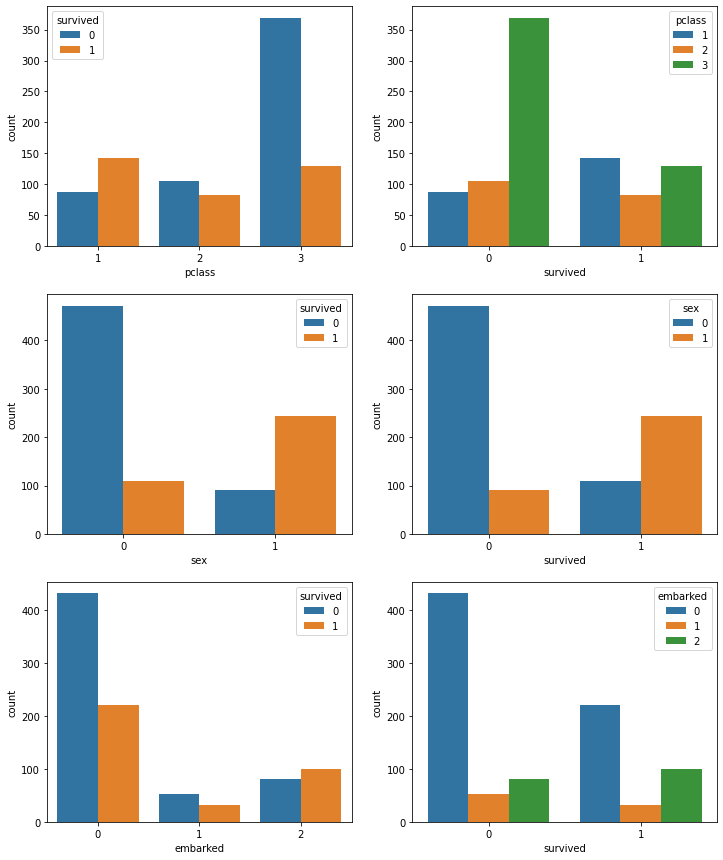

In [205]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='pclass', hue='survived', data=train_df)

plt.subplot(3, 2, 2)
sns.countplot(x='survived', hue='pclass', data=train_df)

plt.subplot(3, 2, 3)
sns.countplot(x='sex', hue='survived', data=train_df)

plt.subplot(3, 2, 4)
sns.countplot(x='survived', hue='sex', data=train_df)

plt.subplot(3, 2, 5)
sns.countplot(x='embarked', hue='survived', data=train_df)

plt.subplot(3, 2, 6)
sns.countplot(x='survived', hue='embarked', data=train_df)

**<생존율>**
1.  1등급 > 2등급 > 3등급\
    --1등급 승객들만 사망자보다 생존자가 많다. (2, 3등급 승객들은 사망자가 더 많다.)
2. 여자 > 남자
3. 율: C > Q > S, 수: S > C > Q

### 수치형 feature(age, sibsp, parch, fare)이 survived에 영향을 줬는가?

In [206]:
 from scipy import stats

In [207]:
def analyze_valid_features(df, col_name, distribution_check=True):
    # survived 기준, 각 그룹 분포 그래프
    survived_distribution_graph = sns.FacetGrid(df, col='survived')
    survived_distribution_graph.map(plt.hist, col_name, bins=30)

    # survived 기준, 각 그룹 표준편차 
    survived = df[df['survived']==1]
    survived_static = np.array(survived[col_name])
    print("survived std: %.2f" % np.std(survived_static))

    n_survived = df[df['survived']==0]
    n_survived_static = np.array(n_survived[col_name])
    print("not survived std: %.2f" % np.std(n_survived_static))

    # 두 그룹 평균차이 검정: T-test
    t_test = stats.ttest_ind(survived[col_name], n_survived[col_name])
    t_test_diff_var = stats.ttest_ind(survived[col_name], n_survived[col_name], equal_var=False)
    print("assuming equal variance, tstatistic %.3f and pvalue %.3f" % t_test)
    print("not assuming equal variance, tstatistic %.3f and pvalue %.3f" % t_test_diff_var)

    # 두 그룹의 분포의 정규성 검정
    if distribution_check:
        print("in survived, wstatistic %.3f and pvalue %.3f" % stats.shapiro(survived[col_name]))
        print("in not survived, wstatistic %.3f and pvalue %.3f" % stats.shapiro(n_survived[col_name]))

#### age
null 값이 포함되어 있기 때문에 age가 0 초과인 경우에만 계산 진행

survived std: 14.22
not survived std: 13.71
assuming equal variance, tstatistic -0.546 and pvalue 0.585
not assuming equal variance, tstatistic -0.543 and pvalue 0.587
in survived, wstatistic 0.982 and pvalue 0.001
in not survived, wstatistic 0.968 and pvalue 0.000


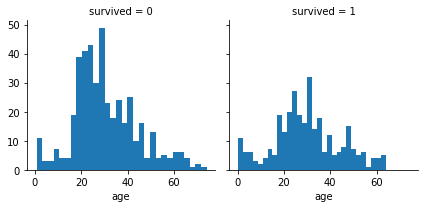

In [208]:
analyze_valid_features(train_df[train_df['age'] > 0], 'age', distribution_check=True)

survived, n_survived 간에 차이가 거의 없다. \
= age는 영향력이 큰 feature가 아니다.

#### sibsp

survived std: 0.64
not survived std: 1.34
assuming equal variance, tstatistic -2.118 and pvalue 0.034
not assuming equal variance, tstatistic -2.446 and pvalue 0.015


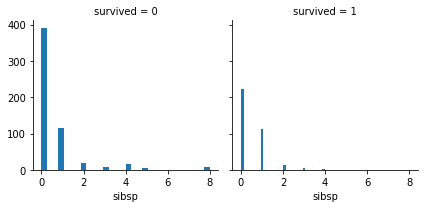

In [209]:
analyze_valid_features(train_df, 'sibsp', distribution_check=False)

p value가 0.05 미만이므로 std 차이는 의미가 있다. 

#### parch

survived std: 0.74
not survived std: 0.89
assuming equal variance, tstatistic 1.865 and pvalue 0.063
not assuming equal variance, tstatistic 1.942 and pvalue 0.052
in survived, wstatistic 0.630 and pvalue 0.000
in not survived, wstatistic 0.421 and pvalue 0.000


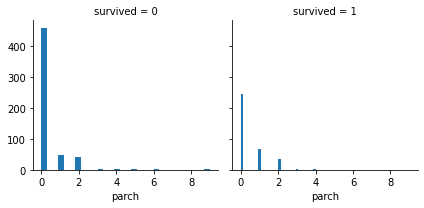

In [210]:
analyze_valid_features(train_df, 'parch', distribution_check=True)

p value가 0.05 미만이므로 std 차이는 의미가 있다. 

#### fare

survived std: 60.68
not survived std: 33.65
assuming equal variance, tstatistic 7.523 and pvalue 0.000
not assuming equal variance, tstatistic 6.657 and pvalue 0.000
in survived, wstatistic 0.660 and pvalue 0.000
in not survived, wstatistic 0.520 and pvalue 0.000


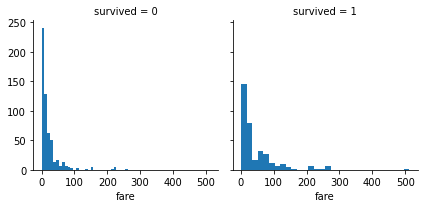

In [211]:
analyze_valid_features(train_df, 'fare', distribution_check=True)

p value가 0.05 미만이므로 std 차이는 의미가 있다. 

# [2-1] 분류 모델 만들기: Logistic Regression
기존 회귀분석의 예측값(Y)를 0~1로 제한, \
    * 0.5 보다 크면: 1 \
    * 0.5 보다 작으면: 0         으로 분류하는 방법. \
* 장점: 계수분석을 통한 feature 영향력 해석이 용이하다. 
* 순서:
    1. 결측값 처리
        * 결측이 존재하는 데이터 삭제 \
            --주관 개입 X but 중요한 정보를 삭제하게될 수 있다. 
        * 결측을 평균값, 중앙값, 최빈값 등으로 대체 \
            --데이터를 모두 분석에 활용할 수 있지만 수치 왜곡의 가능성이 있다. 
    2. train/test dataset분류 후 trainset으로 모델 학습 
        * sklearn.linear_model, LogisticRegression
    3. 학습결과 평가 
        * 평가기준: Confusion Matrix 활용

## 결측값 처리

In [212]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       741 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       305 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fare      393 non

In [213]:
# train_df, test_df의 age 
age_mean = train_df[train_df['age'] > 0]['age'].mean() # 0으로 기록된 데이터는 평균계산에 포함 X 
train_df['age'] = train_df['age'].fillna(age_mean)
test_df['age'] = test_df['age'].fillna(age_mean)  

** Think:* \
train_df['age']의 평균으로 train_df, test_df 의 결측치를 대체했다. \
train_df와 test_df를 합친 뒤 평균을 내야 더 정확하지 않을까? 

In [214]:
# train_df의 embarked
embarked_mode = train_df['embarked'].value_counts().index[0]  # embarked는 범주형 feature이므로 최빈값으로 대체
train_df['embarked'] = train_df['embarked'].fillna(embarked_mode)

In [215]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  916 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 57.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       393 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fare      393 non

## 원핫인코딩

In [216]:
train_df.loc[(train_df['sex']==1), 'sex'] = 'female'
train_df.loc[(train_df['sex']==0), 'sex'] = 'male'
train_df.loc[(train_df['embarked']==2), 'embarked'] = 'C'
train_df.loc[(train_df['embarked']==1), 'embarked'] = 'Q'
train_df.loc[(train_df['embarked']==0), 'embarked'] = 'S'

train_df.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C


** Think:* \
이 작업 너무 바보같다..

In [217]:
whole_df = train_df.append(test_df)
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [218]:
train_idx = len(train_df)

whole_df_encoded = pd.get_dummies(whole_df)
train_df = whole_df_encoded[:train_idx]
test_df = whole_df_encoded[train_idx:]

print(len(train_df), len(test_df))

916 393


In [219]:
display(train_df.head(3))
display(test_df.head(3))

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.0,0,1,19.5000,1,0,0,0,1
1,2,1,4.0,1,1,23.0000,1,0,0,0,1
2,2,1,30.0,1,0,13.8583,1,0,1,0,0


,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,0,38.0,0,0,7.8958,0,1,0,0,1
1,2,1,21.0,0,1,21.0000,1,0,0,0,1
2,2,0,42.0,1,0,27.0000,0,1,0,0,1


## Logistic Regression 학습하기

In [220]:
from sklearn.linear_model import LogisticRegression

In [221]:
x_train, y_train = train_df.loc[:, train_df.columns != 'survived'].values, train_df['survived'].values
x_test, y_test = test_df.loc[:, test_df.columns != 'survived'].values, test_df['survived'].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(916, 10) (916,)
(393, 10) (393,)


In [222]:
lr = LogisticRegression(random_state=10)

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
y_pred = lr.predict(x_test)

In [224]:
y_pred_probability = lr.predict_proba(x_test)[:,1]

## 결과 평가하기: Confusion Matrix


In [225]:
from sklearn.metrics import confusion_matrix

In [226]:
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion_matrix

array([[214,  32],
       [ 48,  99]])

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [228]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("precision: %.3f" % precision_score(y_test, y_pred))
print("recall: %.3f" % recall_score(y_test, y_pred))
print("f1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.80
precision: 0.756
recall: 0.673
f1: 0.712


AUC(Area Under Curve) \
- Logistic Regressoin으로 분류된 y_pred(0 또는 1의 값)이 아니라 \
    y_pred_probability(0에서 1사이의 확률)을 사용할 것. 
- 1에 가까울수록 좋은 모델. 

In [229]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("auc: %.3f" % roc_auc)

auc: 0.838


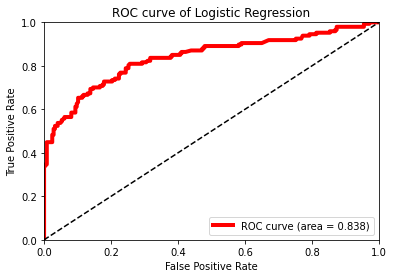

In [230]:
plt.plot(false_positive_rate, true_positive_rate, 
         label='ROC curve (area = %.3f)' % roc_auc, 
         color='red', 
         linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Logistic Regression")
plt.legend(loc = "lower right")
plt.show()

# [2-2] 분류 모델 만들기: Decision Tree 
- feature 단위로 조건을 분기하여 정답 집합을 좁혀나가는 방법. 

accuracy: 0.75
precision: 0.676
recall: 0.626
f1: 0.650
auc: 0.738


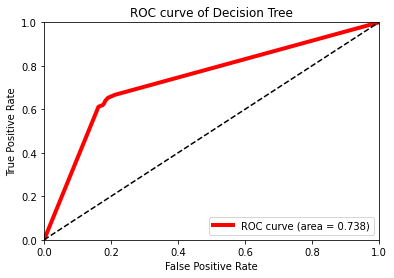

In [231]:
from sklearn.tree import DecisionTreeClassifier

# 1. 모델 객체 만들기
decision_tree = DecisionTreeClassifier()

# 2. train dataset으로 모델 학습시키기
decision_tree.fit(x_train, y_train)

# 3. test data로 inference
y_pred_decisiontree = decision_tree.predict(x_test)
y_pred_probability_decisiontree = decision_tree.predict_proba(x_test)[:, 1]

# 4. inference 평가하기
# 4-1. accuracy, precision, recall, f1 score
print("accuracy: %.2f" % accuracy_score(y_test, y_pred_decisiontree))
print("precision: %.3f" % precision_score(y_test, y_pred_decisiontree))
print("recall: %.3f" % recall_score(y_test, y_pred_decisiontree))
print("f1: %.3f" % f1_score(y_test, y_pred_decisiontree))
# 4-2. auc score
false_positive_rate_decisiontree, true_positive_rate_decisiontree, thresholds = roc_curve(y_test, y_pred_probability_decisiontree)
roc_auc_decisiontree = roc_auc_score(y_test, y_pred_probability_decisiontree)
print("auc: %.3f" % roc_auc_decisiontree)
# 4-3. roc curve 
plt.plot(false_positive_rate_decisiontree, true_positive_rate_decisiontree, 
         label='ROC curve (area = %.3f)' % roc_auc_decisiontree, 
         color='red', 
         linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Decision Tree")
plt.legend(loc = "lower right")
plt.show()

In [232]:
# LogisticRegression vs DecisionTree

print("<logistic vs decisiontree> \n")

print("accuracy: %.2f vs %.2f" % (accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_decisiontree)))
print("precision: %.3f vs %.3f" % (precision_score(y_test, y_pred), precision_score(y_test, y_pred_decisiontree)))
print("recall: %.3f vs %.3f" % (recall_score(y_test, y_pred), recall_score(y_test, y_pred_decisiontree)))
print("f1: %.3f vs %.3f" % (f1_score(y_test, y_pred), f1_score(y_test, y_pred_decisiontree)))
print("auc: %.3f vs %.3f" % (roc_auc, roc_auc_decisiontree))

<logistic vs decisiontree> 

accuracy: 0.80 vs 0.75
precision: 0.756 vs 0.676
recall: 0.673 vs 0.626
f1: 0.712 vs 0.650
auc: 0.838 vs 0.738


Logistic Regression이 Decision Tree보다 성능이 약간 더 좋다. 

# [3] 모델 개선하기: feature engineering

In [233]:
train_df = pd.read_csv(train_dataset_file_path)
test_df = pd.read_csv(test_dataset_file_path)

In [234]:
print(train_df.columns == test_df.columns)
print(train_df.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')


## 분석에 사용할 feature 고르기
* 첫 분석 때 제거했던 feature: name, ticket, cabin, body, home.dest
* 지금 분석 때 제거할 feature: ticket, body, home.dest
    - name, cabin feature을 사용해보기로 함. 

In [235]:
train_df = train_df.drop(train_df[['ticket', 'body', 'home.dest']], axis=1)
test_df = test_df.drop(test_df[['ticket', 'body', 'home.dest']], axis=1)

In [236]:
display(train_df.head(3))
display(test_df.head(3))

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,19.5000,NaN,S
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,23.0000,NaN,S
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,13.8583,NaN,C


,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,7.8958,NaN,S
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,21.0000,NaN,S
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,27.0000,NaN,S


## 결측치 처리하기

In [237]:
whole_df = train_df.append(test_df)
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [238]:
train_idx = len(train_df)
train_idx

916

### pclass: 결측치 없음

In [239]:
whole_df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

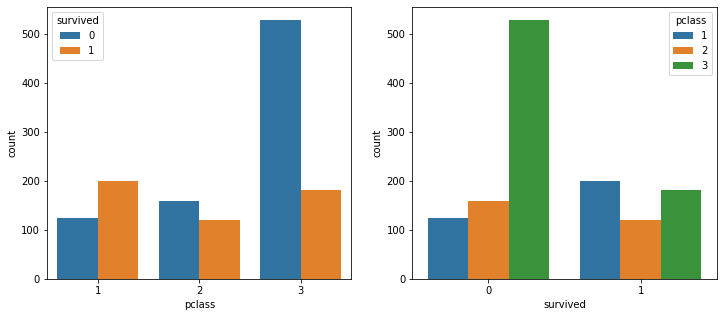

In [240]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='pclass', hue='survived', data=whole_df)

plt.subplot(1, 2, 2)
sns.countplot(x='survived', hue='pclass', data=whole_df)

### age: 평균값으로 대체

In [241]:
age_mean = whole_df[whole_df['age'] > 0]['age'].mean()
whole_df['age'] = whole_df['age'].fillna(age_mean)
whole_df['age'].isnull().value_counts()

False    1309
Name: age, dtype: int64

In [242]:
def age_classification(age):
    return str(age)[0] + "0"

In [243]:
whole_df['age'] = whole_df['age'].apply(lambda x: age_classification(x))
whole_df['age'].value_counts().sort_index()

00     12
10    153
20    619
30    239
40    145
50     75
60     38
70     11
80      7
90     10
Name: age, dtype: int64

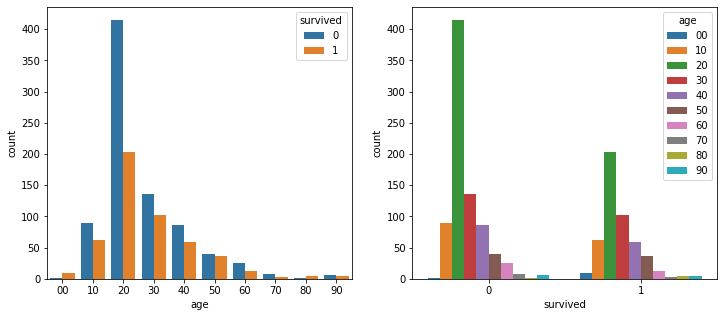

In [244]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='survived', data=whole_df, order=whole_df['age'].value_counts().sort_index().index)

plt.subplot(1, 2, 2)
sns.countplot(x='survived', hue='age', data=whole_df, hue_order=whole_df['age'].value_counts().sort_index().index)

### embarked: 최빈값으로 대체

In [245]:
embarked_mode = whole_df['embarked'].value_counts().index[0]
whole_df['embarked'] = whole_df['embarked'].fillna(embarked_mode)
whole_df['embarked'].isnull().value_counts()

False    1309
Name: embarked, dtype: int64

In [246]:
whole_df['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

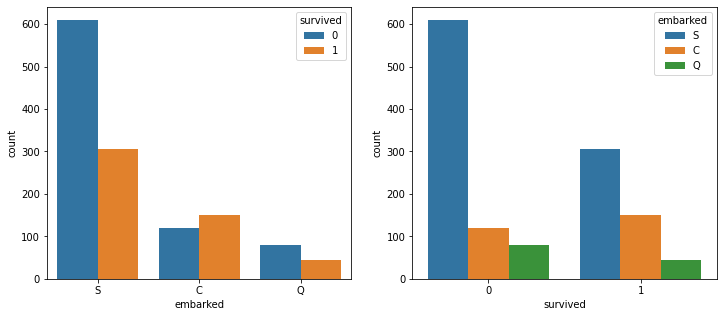

In [247]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='embarked', hue='survived', data=whole_df)

plt.subplot(1, 2, 2)
sns.countplot(x='survived', hue='embarked', data=whole_df)


### cabin: 정보없음을 그대로 사용

In [248]:
cabin_series = whole_df['cabin'].value_counts()
cabin_series

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
B96 B98            4
                  ..
A16                1
A32                1
F38                1
D22                1
A18                1
Name: cabin, Length: 186, dtype: int64

In [249]:
cabin_list = list(whole_df['cabin'].dropna().values)
cabin_list[:10]

['E36', 'C68', 'E24', 'C22 C26', 'D38', 'B50', 'A24', 'C111', 'F', 'C6']

In [250]:
cabin_alphabet = []
for i in range(len(cabin_list)):
    cabin_alphabet.append(cabin_list[i][0])
print(cabin_alphabet)

['E', 'C', 'E', 'C', 'D', 'B', 'A', 'C', 'F', 'C', 'C', 'E', 'B', 'C', 'D', 'D', 'C', 'C', 'B', 'T', 'B', 'B', 'A', 'A', 'B', 'G', 'C', 'C', 'D', 'D', 'C', 'E', 'B', 'B', 'E', 'C', 'B', 'A', 'D', 'E', 'C', 'D', 'E', 'B', 'D', 'F', 'E', 'D', 'A', 'D', 'A', 'F', 'D', 'A', 'B', 'D', 'E', 'G', 'C', 'D', 'E', 'C', 'B', 'A', 'B', 'F', 'D', 'C', 'C', 'F', 'C', 'C', 'C', 'G', 'C', 'C', 'E', 'F', 'D', 'E', 'D', 'B', 'C', 'B', 'C', 'E', 'F', 'C', 'D', 'B', 'E', 'B', 'D', 'B', 'C', 'B', 'B', 'F', 'D', 'A', 'C', 'B', 'C', 'B', 'D', 'B', 'C', 'C', 'E', 'F', 'B', 'C', 'D', 'C', 'A', 'B', 'B', 'C', 'D', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'F', 'A', 'E', 'C', 'C', 'C', 'B', 'A', 'C', 'C', 'D', 'C', 'C', 'B', 'B', 'E', 'E', 'F', 'F', 'E', 'C', 'E', 'B', 'C', 'A', 'D', 'E', 'F', 'F', 'B', 'D', 'D', 'B', 'E', 'C', 'D', 'C', 'D', 'E', 'E', 'C', 'C', 'F', 'C', 'C', 'B', 'C', 'D', 'C', 'C', 'E', 'B', 'D', 'E', 'C', 'C', 'C', 'A', 'G', 'C', 'E', 'C', 'D', 'C', 'E', 'C', 'B', 'C', 'E', 'C', 'C', 'B',

In [251]:
def count_cabin(list):
    cabin_dict = {}
    for i in list:
        try: cabin_dict[i] += 1
        except: cabin_dict[i] = 1
    return cabin_dict

count_cabin(cabin_alphabet)

{'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 41, 'F': 21, 'G': 5, 'T': 1}

G와 T로 시작하는 선실과 null값을 가진 선실들을 X로 대체하기로 한다. 

In [252]:
whole_df['cabin'] = whole_df['cabin'].fillna('X')
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])
whole_df['cabin'] = whole_df['cabin'].replace({"G": "X", "T":"X"})

In [253]:
whole_df['cabin'].value_counts()

X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64

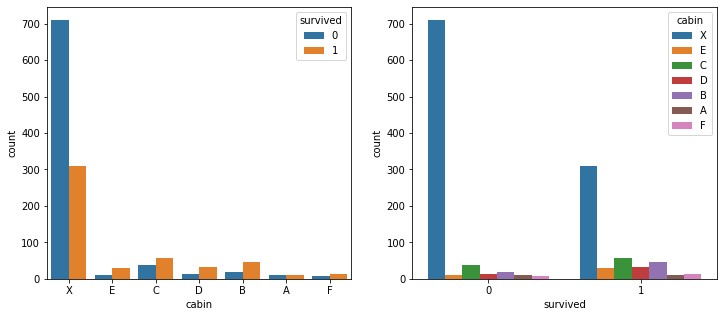

In [254]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='cabin', hue='survived', data=whole_df)

plt.subplot(1, 2, 2)
sns.countplot(x='survived', hue='cabin', data=whole_df)

### name: 결측치 없음

In [255]:
whole_df['name']

0                 Mellinger, Miss. Madeleine Violet
1                                 Wells, Miss. Joan
2                    Duran y More, Miss. Florentina
3                                Scanlan, Mr. James
4                      Bradley, Miss. Bridget Delia
                           ...                     
388               Karlsson, Mr. Julius Konrad Eugen
389    Ware, Mrs. John James (Florence Louise Long)
390                            O'Keefe, Mr. Patrick
391                                Tobin, Mr. Roger
392                            Daniels, Miss. Sarah
Name: name, Length: 1309, dtype: object

In [256]:
name_grade = whole_df['name'].apply(lambda x: x.split(",", 1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
name_grade

[' Miss',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Dr',
 ' Mlle',
 ' Col',
 ' Rev',
 ' Ms',
 ' Mme',
 ' Sir',
 ' the Countess',
 ' Dona',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Don',
 ' Capt']

In [257]:
# 1910년대 기준 호칭에 따른 사회적 지위 정의
grade_dict = {'A': [' Dr', ' Col', ' Rev', ' Sir', ' Major', ' Capt'],  # 명예직
            'B': [' the Countess', ' Jonkheer'],   # 귀족, 작위 
            'C': [' Mrs', ' Ms', ' Mme', ' Dona'],   # 여성
            'D': [' Mr', ' Don'],   # 남성
            'E': [' Miss', ' Mlle', ' Lady'],   # 젊은 여성
            'F': [' Master']}   # 젏은 남성  

In [258]:
def give_name_grade(x):
    grade = x.split(",", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value: 
            if grade == title:
                return key
    return 'G'

In [259]:
whole_df['name'] = whole_df['name'].apply(lambda x: give_name_grade(x))
whole_df['name'].value_counts()

D    758
E    263
C    201
F     61
A     24
B      2
Name: name, dtype: int64

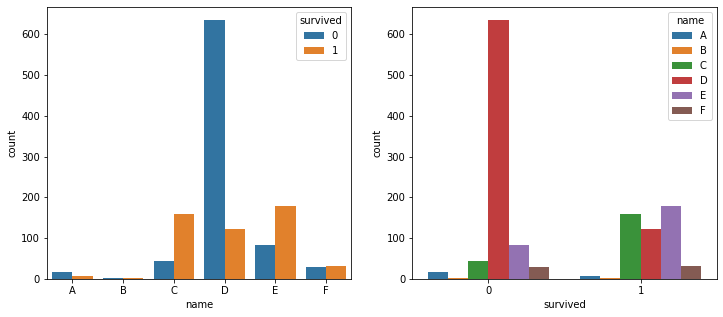

In [260]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='name', hue='survived', data=whole_df, order=whole_df['name'].value_counts().sort_index().index)

plt.subplot(1, 2, 2)
sns.countplot(x='survived', hue='name', data=whole_df, hue_order=whole_df['name'].value_counts().sort_index().index)

**<가설>**
* pclass: 1등급 승객은 생존률이 높고, 3등급 승객은 생존률이 낮다.
* age: 20~30대는 사망률이 현저히 높다. 
* embarked: C 승객은 생존률이 높고, S 승객은 생존률이 낮다. 
* cabin: X 선실 승객은 생존률이 현저히 낮다. 
* name: 여성(젊은 여성 포함)은 생존률이 현저히 높고, 남성(젊은 남성 미포함)은 생존률이 현저히 낮다.

## 범주형 feature 원핫인코딩 적용하기

In [261]:
whole_df_encoded = pd.get_dummies(whole_df, columns=['name', 'cabin', 'embarked', 'sex']) 

In [262]:
train_df = whole_df_encoded[:train_idx]
test_df = whole_df_encoded[train_idx:]

print(train_df.shape, test_df.shape)

(916, 24) (393, 24)


In [263]:
train_df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'name_A',
       'name_B', 'name_C', 'name_D', 'name_E', 'name_F', 'cabin_A', 'cabin_B',
       'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_X', 'embarked_C',
       'embarked_Q', 'embarked_S', 'sex_female', 'sex_male'],
      dtype='object')

## 학습하기

In [282]:
x_train, y_train = train_df.loc[:, train_df.columns != 'survived'].values, train_df['survived'].values
x_test, y_test = test_df.loc[:, test_df.columns != 'survived'].values, test_df['survived'].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1048, 23) (1048,)
(261, 23) (261,)


In [283]:
lr = LogisticRegression(random_state=10)

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
y_pred = lr.predict(x_test)

In [285]:
y_pred_probability = lr.predict_proba(x_test)[:,1]

## 평가하기

In [286]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("precision: %.3f" % precision_score(y_test, y_pred))
print("recall: %.3f" % recall_score(y_test, y_pred))
print("f1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.80
precision: 0.753
recall: 0.700
f1: 0.725


In [269]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("auc: %.3f" % roc_auc)

auc: 0.847


<이전 평가지표> \
accuracy: 0.80 \
precision: 0.756 \
recall: 0.673 \
f1: 0.712 \
auc: 0.838

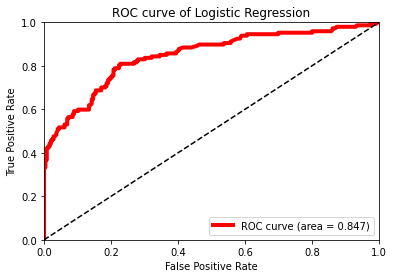

In [270]:
plt.plot(false_positive_rate, true_positive_rate, 
         label='ROC curve (area = %.3f)' % roc_auc, 
         color='red', 
         linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Logistic Regression")
plt.legend(loc = "lower right")
plt.show()

# [4] 모델 검증하기: 과적합 여부 검증
1. K-fold 교차검증(K-fold cross validation): 
    * train dataset과 test dataset이 불균등하게 나눠졌을 가능성을 낮추는 방법. 
    * 데이터를 k개의 fold로 나누어 k-1개는 train dataset으로, 나머지 1개는 test datset으로 사용. 
    * 총 k회 학습을 통해 모델의 분할검증을 k번 반복. 
    * k번의 검증과정에서 테스트 점수간 차이가 크지 않다면 과적합이 일어나지 않음. 
2. 학습곡선(Learning Curve)

## 1. K-Fold 교차검증

In [271]:
from sklearn.model_selection import KFold

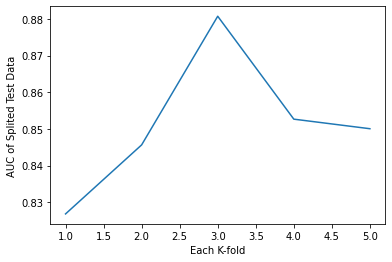

In [289]:
k = 5
cv = KFold(k, shuffle=True, random_state=7)
auc_history = []

for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    train_df = whole_df_encoded.iloc[train_data_row]
    test_df = whole_df_encoded.iloc[test_data_row]

    splited_x_train, splited_y_train = train_df.loc[:, train_df.columns != 'survived'].values, train_df['survived'].values
    splited_x_test, splited_y_test = test_df.loc[:, test_df.columns != 'survived'].values, test_df['survived'].values

    lr = LogisticRegression(random_state=7)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    y_pred_probability = lr.predict_proba(splited_x_test)[:, 1]

    false_positive_rate, true_positive_rate, thresholds = roc_curve(splited_y_test, y_pred_probability)
    roc_auc = roc_auc_score(splited_y_test, y_pred_probability)
    auc_history.append(roc_auc)

plt.xlabel("Each K-fold")
plt.ylabel("AUC of Splited Test Data")
plt.plot(range(1, k+1), auc_history)
plt.show()

* AUC가 큰 폭으로 변한다. --불안정한 모델 \
    cf. AUC가 큰 폭으로 변하는 이유: 데이터의 수가 적음 \
* AUC가 0.8 이상이다. --과적합 발생
 


## 2. 학습곡선

In [290]:
!pip install scikit-plot

In [291]:
import scikitplot as skplt

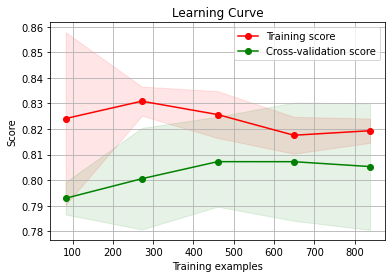

In [292]:
# 학습데이터 샘플 수가 증가함에 따라 학습과 테스트 두 점수가 어떻게 변화하는지 관찰 
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()